# Problem Statement
Using the data collected from existing customers, build a model that will help the marketing team identify potential 
customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Variables:
#### Bank Client Data
1.age:Continuous feature 
2.job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
3.marital: marital status(married, single, divorced)
4.education:education level (primary, secondary, tertiary)
5.default: has credit in default? 
6.housing: has housing loan? 
7.loan: has personal loan?
8.balance in account

#### Related to previous contact:
9.contact: contact communication type
10.month: last contact month of year
11.day: last contact day of the month
12.duration: last contact duration, in seconds

#### Other attributes:
13.campaign: number of contacts performed during this campaign and for this client
14.pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
15.previous: number of contacts performed before this campaign and for this client16.poutcome: outcome of the previous marketing campaignOutput variable 

(desired target):
17.Target: Tell us has the client subscribed a term deposit. (Yes, No)

Source and Citation:  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
    

In [17]:
# Import libraries and load dataset
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from yellowbrick.classifier import ClassificationReport, ROCAUC
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
###########

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

df = pd.read_csv('bank-full.csv')

### Deliverable –1 (Exploratory data quality report reflecting the following)–(20)
1.Univariate analysis(12marks)

In [18]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [19]:
df.shape

(45211, 17)

In [20]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

We see Target is the dependent variable and it is an object, with Yes/No. as some models will not work as it is we need to transform it (or inform each mpodel that it is a binary and pass the PosLabel of it, but I prefer to transform it for all the models )

In [21]:
# description of all variables :              (I choose to do all columns to see also the top and unique of categorical variables)
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,"45,211.00",NaN,NaN,NaN,40.94,10.62,18.00,33.00,39.00,48.00,95.00
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,"45,211.00",NaN,NaN,NaN,"1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,"45,211.00",NaN,NaN,NaN,15.81,8.32,1.00,8.00,16.00,21.00,31.00


In [22]:
df.median()     # observe the pdays has a median of -1 (customer has not been contacted)
# According to documentation, -1 means over 900 days or never contacted the customer

age         39.00
balance    448.00
day         16.00
duration   180.00
campaign     2.00
pdays       -1.00
previous     0.00
dtype: float64

In [23]:
print ("Number of unique values in each column:")
for i in list(df.columns):   # checking value counts of all object type columns
    print([i], df[i].nunique())    

Number of unique values in each column:
['age'] 77
['job'] 12
['marital'] 3
['education'] 4
['default'] 2
['balance'] 7168
['housing'] 2
['loan'] 2
['contact'] 3
['day'] 31
['month'] 12
['duration'] 1573
['campaign'] 48
['pdays'] 559
['previous'] 41
['poutcome'] 4
['Target'] 2


In [24]:
# Number of null values in each column
print(df.isnull().sum())
# there are no null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [25]:
# see the different values of each column  (I saw and then omit the values of some categorical values)
#print(df.age.value_counts())
print(df.job.value_counts())
print(df.marital.value_counts())
print(df.education.value_counts())
print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
#print(df.balance.value_counts())
print(df.contact.value_counts())
print(df.month.value_counts())
print(df.day.value_counts())
#print(df.duration.value_counts())
print(df.campaign.value_counts())
print(df.pdays.value_counts())
print(df.previous.value_counts())
print(df.poutcome.value_counts())
print(df.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830

In [26]:
## we note a high number of -1 values (customer not contacted) in 'previous'
## also lots of unknown values in 'pdays'

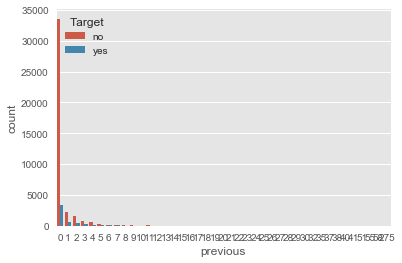

In [27]:
## column 'previous' has a problem of an outlier - we need to replace it.
%matplotlib inline 
sns.countplot(df['previous'],hue=df['Target'])

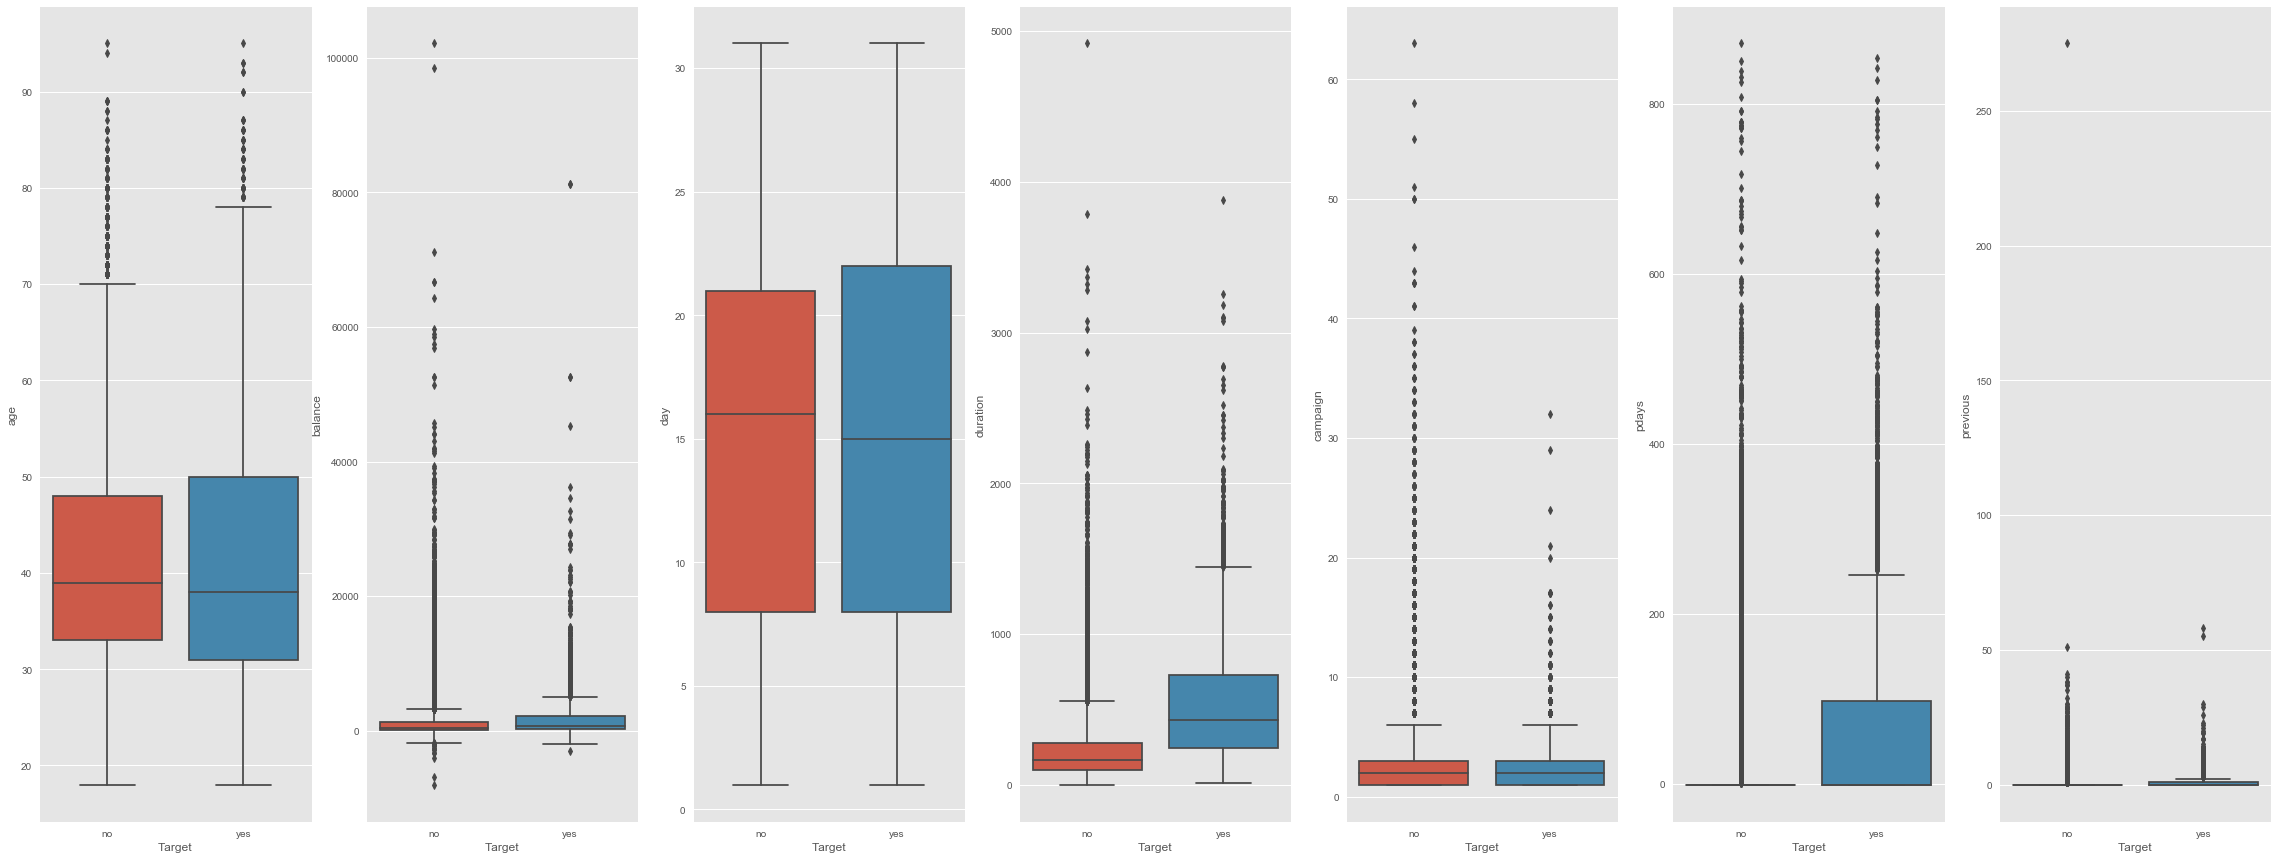

In [28]:
# Create a list with features for plotting boxplots and analyze if there are outliers:
features = ['age','balance','day','duration','campaign','pdays','previous']
# Create boxplots to understand differences in distributions among variables
fig, axs = plt.subplots(ncols = len(features), figsize = (40, 15))

for idx, field in enumerate(features):
    sns.boxplot(x = 'Target', 
                y = field, 
                data = df,
                ax = axs[idx])
    
    # once again, we confirm 'previous' has a far away outlier that we need to fix

AxesSubplot(0.125,0.125;0.775x0.755)


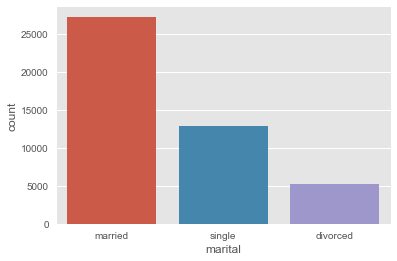

In [29]:
# Review the distribution of the categorical values:
print(sns.countplot(df['marital']))
# no issues

AxesSubplot(0.125,0.125;0.775x0.755)


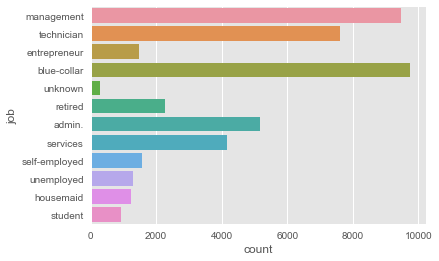

In [30]:
print(sns.countplot(y=df['job']))
# no issues

AxesSubplot(0.125,0.125;0.775x0.755)


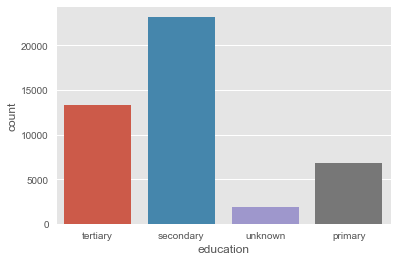

In [31]:
print(sns.countplot(df['education']))
#Unknown could mean 'no formal education', so, I'm going to leave it

AxesSubplot(0.125,0.125;0.775x0.755)


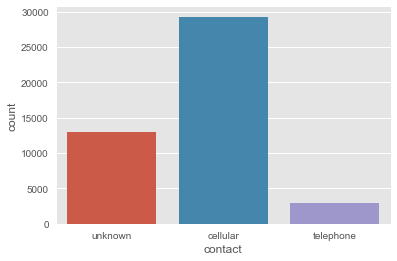

In [32]:
print(sns.countplot(df['contact']))
# I'm going to keave it as it is, because unknown cound mean 'don't have a phone'

AxesSubplot(0.125,0.125;0.775x0.755)


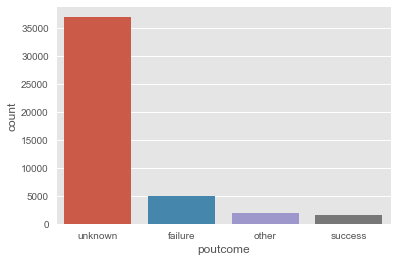

In [33]:
print(sns.countplot(df['poutcome']))
# we could drop this feature as has a high number (81%) of unknowns , because it does not provide a lot of information

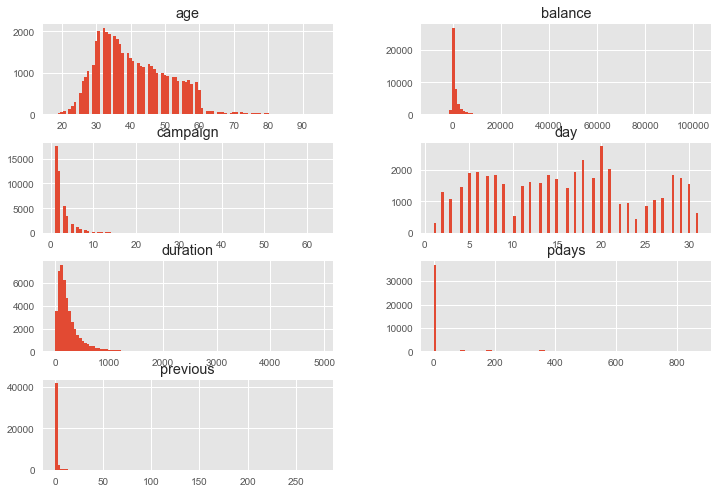

In [34]:
# Obtain the univariate plots for 
columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

# Balance, duration, previous, pdays and campaign, are highly biased columns

###### Comments:  
####### As noted above, there are highly biased variables, with lots of outliers, but 'previous' stands out with a far outlier
####### there are several columns with 'unknown' but could it be a bad encoding for ' no education, no telephone cases, so I'm going to leave them,
####### but the one I believe needs to be dropped is 'poutcome' with 81% of 'unknown' (no information) cases
####### pdays could be used, but needs transformation as -1 (60% of cases) signify that the customer has not been contacted

#### 2.Multivariate analysis(8marks)

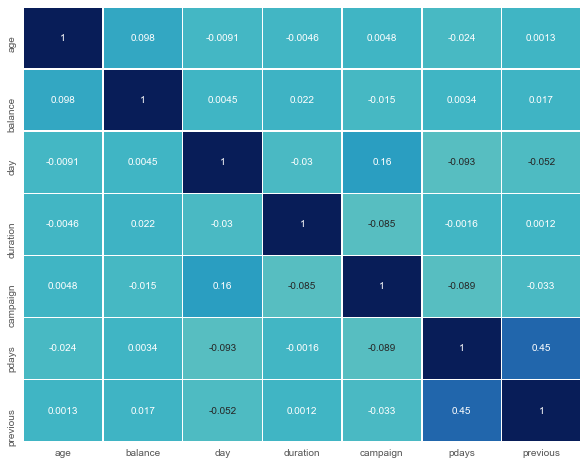

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

There is no strong correlation among variables

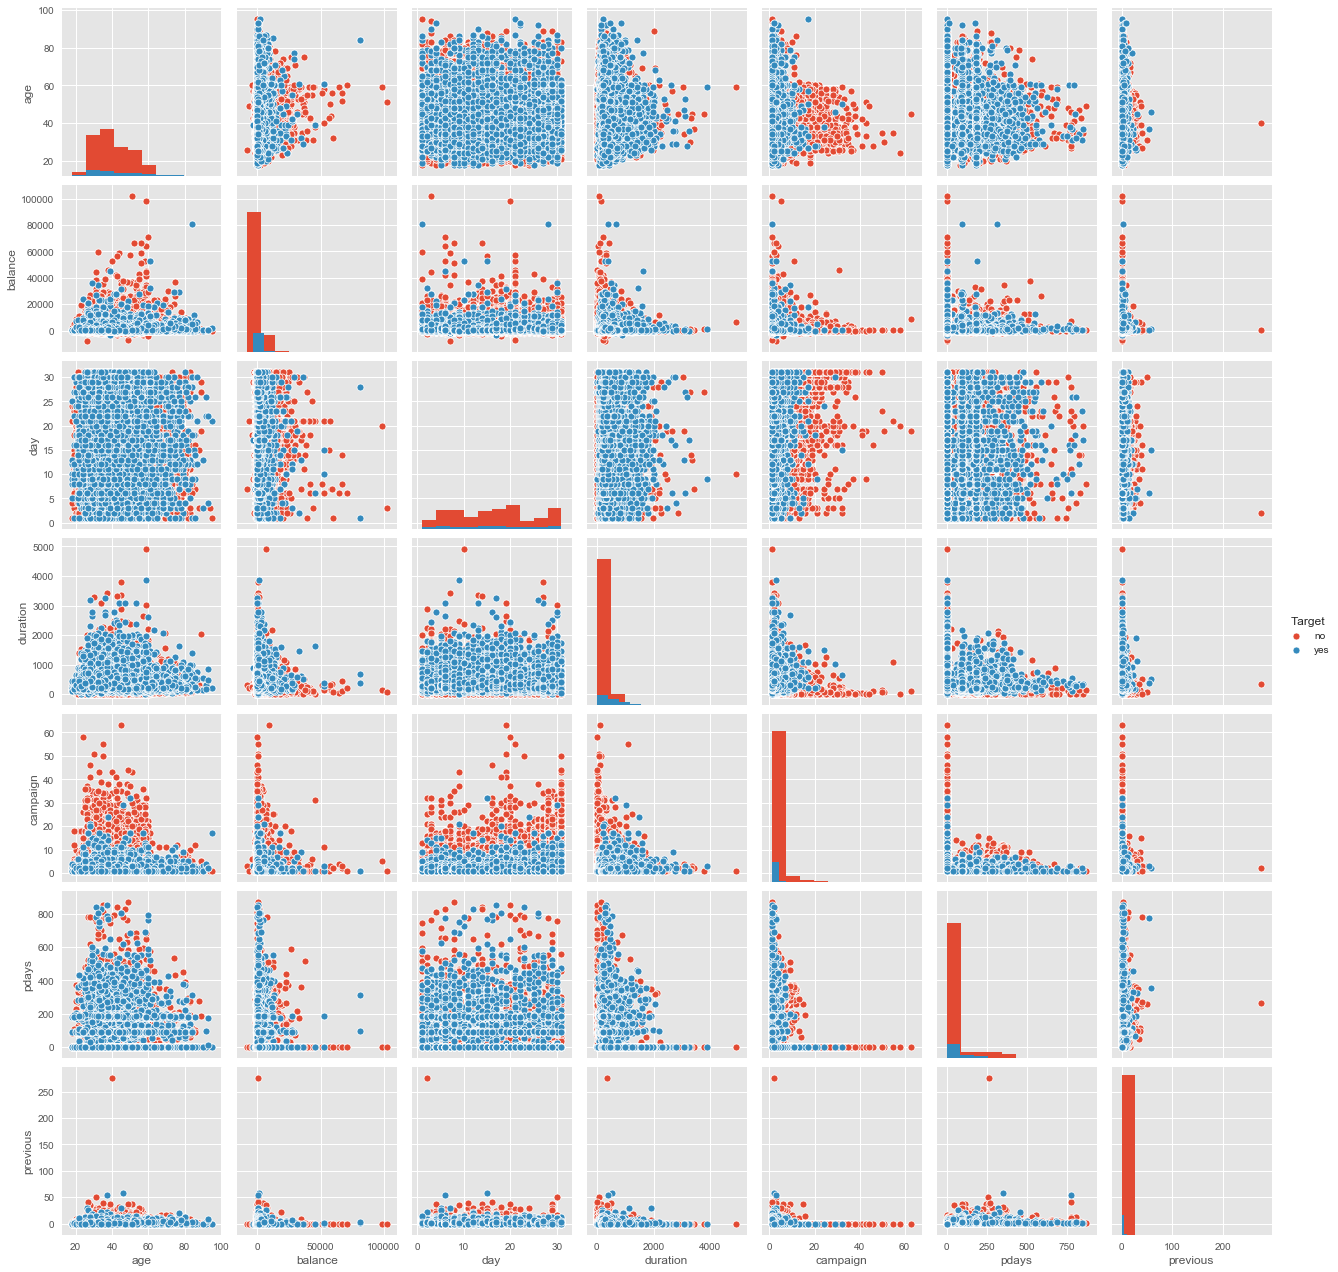

In [36]:
#sns.pairplot(df, hue = 'Target')
sns.pairplot(df,diag_kind='hist', hue='Target')

######  Comments:
#######  No significant correlation among the variables is present.
#######  Outliers are mostly compund of Target='No' cases
#######  Once again, we confirm the outlier in the 'previous' column 

#### Substituting outliers and dropping variables that don't provide usable information:
- Outlier in 'previous'
- Changing 'pdays' to categoric or substituting the -1 values
- Dropping 'poutcome'
- Transform the dependant variable fron Yes/No into 1/0

### Deliverable –2 (Prepare the data for analytics)–(10)

In [37]:
# Substituting the target variable from Yes/no --> 1/0
df2=df.copy(deep=True)
for i in range(len(df2.Target)):
     if 'no' in df2.Target[i]:
         df2.Target[i] = 0
     else:
         df2.Target[i] = 1  
df2['Target']=df2['Target'].astype(str).astype(int)
print(df.Target.value_counts())
print(df2.Target.value_counts())

no     39922
yes     5289
Name: Target, dtype: int64
0    39922
1     5289
Name: Target, dtype: int64


In [38]:
# substitute negative number in 'pdays'
for i in range(len(df2.pdays)):
     if df2.pdays[i]<0:
         df2.pdays[i]= 900
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,900,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,900,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,900,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,900,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,900,0,unknown,0


In [39]:
print(df2.pdays.mean())     # check 900 is now the highest and then pulled the mean up

776.6459047576917


In [40]:
df3= df2.drop(['poutcome'], axis=1) # dropping 'poutcome' as the majority of the fiel has unknown data - this will only add noise

In [41]:
# substitute the outlier in 'previous'
for i in range(len(df3.previous)):
     if df3.previous[i]>70:
         df3.previous[i]= 70
df3.previous.mean() #(has to reduce)

0.5757890778792771

In [42]:
## Define X and Y variables:
X = df3.drop('Target', axis=1)
y = df3[['Target']]
## Generating dummies:
X = pd.get_dummies(X, drop_first=True)
#X.head()

In [43]:
# splitting data into training and test set for independent attributes
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=33)
print(X_train.shape, X_test.shape)


(31647, 39) (13564, 39)


### Deliverable –3 (create the ensemble model)–(30)

Confusion Matrix


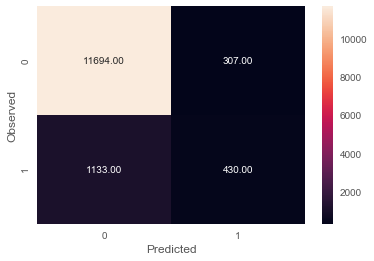

None

Trainig accuracy 0.8969570575409992

Testing accuracy 0.8938366263639045

Recall: 0.2751119641714651

Precision: 0.5834464043419267

F1 Score: 0.3739130434782609

Roc Auc Score: 0.6247653813024646


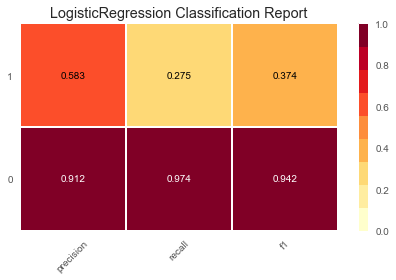

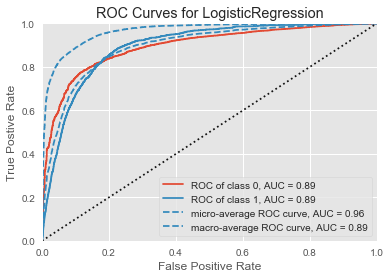

In [44]:
# REGRESSION MODEL
#####################################################################
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
RModel = LogisticRegression(random_state=33, solver='liblinear')  #start 
RModel.fit(X_train, y_train)
y_predict = RModel.predict(X_test)
#####################################################################

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Trainig accuracy",RModel.score(X_train,y_train))  
print()
print("Testing accuracy",RModel.score(X_test, y_test))
print()
Recall=recall_score(y_test,y_predict)
print("Recall:",Recall)
print()
PreScore=precision_score(y_test,y_predict)
print("Precision:",PreScore)
print()
F1Score=f1_score(y_test,y_predict)
print("F1 Score:",F1Score)
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Visualize model performance with yellowbrick library
viz = ClassificationReport(RModel)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RModel)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [45]:
# Store the results for comparison among models
preds_train = RModel.predict(X_train)
preds_test = RModel.predict(X_test)
acc_RM = accuracy_score(y_test, preds_test)
resultsDf = pd.DataFrame({'Method':['LogReg'], 'accuracy': acc_RM,'Precision': PreScore,'Recall': Recall, 'F1 Score': F1Score})
resultsDf = resultsDf[['Method', 'accuracy', 'Precision','Recall','F1 Score']]
resultsDf

,Method,accuracy,Precision,Recall,F1 Score
0,LogReg,0.89,0.58,0.28,0.37


In [46]:
## DECISION TREE
#####################################################################
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index, but makes no difference in the precision  

model_DT = DecisionTreeClassifier(criterion='entropy')
model_DT.fit(X_train, y_train)
y_predict = model_DT.predict(X_test)
print("Train: %.2f" % model_DT.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_DT.score(X_test, y_test))  # performance on test data


Train: 1.00
Test: 0.87


In [47]:
preds_train = model_DT.predict(X_train)
preds_test = model_DT.predict(X_test)
acc_DT = accuracy_score(y_test, preds_test)
Recall=recall_score(y_test,y_predict)
PreScore=precision_score(y_test,y_predict)
F1Score=f1_score(y_test,y_predict)
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT],'Precision': PreScore,'Recall': Recall, 'F1 Score': F1Score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy,Precision,Recall,F1 Score
0,LogReg,0.89,0.58,0.28,0.37
0,Decision Tree,0.87,0.45,0.46,0.46


In [48]:
#### Decision tree - >Pruned
#####################################################################
model_DTP = DecisionTreeClassifier(criterion = "entropy", max_depth=4,max_leaf_nodes=5)
model_DTP.fit(X_train, y_train)
y_predict = model_DTP.predict(X_test)
print("Train: %.2f" % model_DTP.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_DTP.score(X_test, y_test))  # performance on test data

Train: 0.88
Test: 0.88


In [49]:
# prunning removed the overfiting and slighly improved the performance on test data

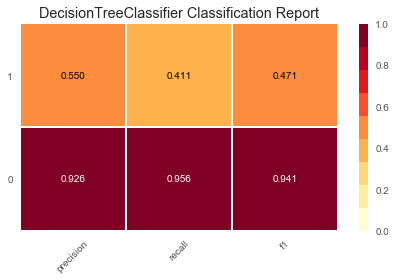

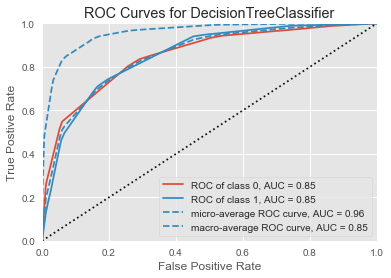

In [50]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=7))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [51]:
# visualize the importance of the features
feat_importance = model_DTP.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, model_DTP.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.70
pdays,0.21
age,0.00
balance,0.00
day,0.00
campaign,0.00
previous,0.00


In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
preds_train = model_DTP.predict(X_train)
preds_test = model_DTP.predict(X_test)
acc_DTP = accuracy_score(y_test, preds_test)
Recall=recall_score(y_test,y_predict)
PreScore=precision_score(y_test,y_predict)
F1Score=f1_score(y_test,y_predict)
tempResultsDf = pd.DataFrame({'Method':['D Tree Prunned'], 'accuracy': [acc_DTP],'Precision': PreScore,'Recall': Recall, 'F1 Score': F1Score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy,Precision,Recall,F1 Score
0,LogReg,0.89,0.58,0.28,0.37
0,Decision Tree,0.87,0.45,0.46,0.46
0,D Tree Prunned,0.88,0.50,0.33,0.40


### Apply the Random forest model and print the accuracy of Random forest Model

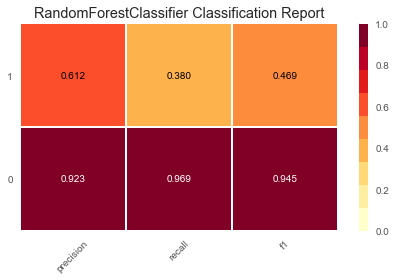

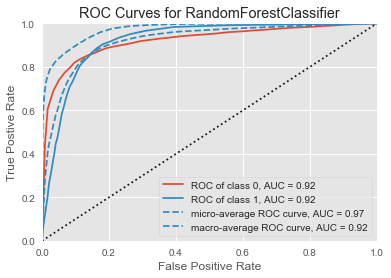

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
Recall=recall_score(y_test,pred_RF)
PreScore=precision_score(y_test,pred_RF)
F1Score=f1_score(y_test,pred_RF)
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF],'Precision': PreScore,'Recall': Recall, 'F1 Score': F1Score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]

# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()


In [54]:
resultsDf

,Method,accuracy,Precision,Recall,F1 Score
0,LogReg,0.89,0.58,0.28,0.37
0,Decision Tree,0.87,0.45,0.46,0.46
0,D Tree Prunned,0.88,0.50,0.33,0.40
0,Random Forest,0.90,0.60,0.37,0.46


#### Compared to the decision tree, we can see that the accuracy has improved for the Random forest model

### Apply Bagging Classifier Algorithm and print the accuracy.

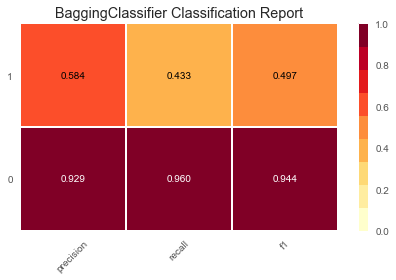

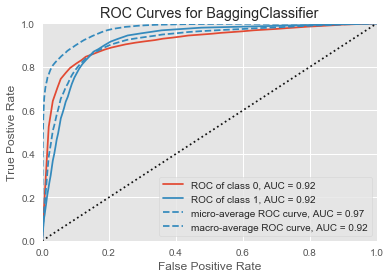

In [55]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
Recall=recall_score(y_test,pred_BG)
PreScore=precision_score(y_test,pred_BG)
F1Score=f1_score(y_test,pred_BG)
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG],'Precision': PreScore,'Recall': Recall, 'F1 Score': F1Score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]

# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()



In [56]:
resultsDf

,Method,accuracy,Precision,Recall,F1 Score
0,LogReg,0.89,0.58,0.28,0.37
0,Decision Tree,0.87,0.45,0.46,0.46
0,D Tree Prunned,0.88,0.50,0.33,0.40
0,Random Forest,0.90,0.60,0.37,0.46
0,Bagging,0.90,0.58,0.43,0.50


## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

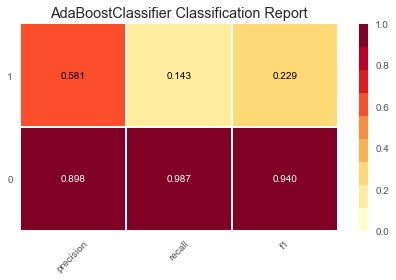

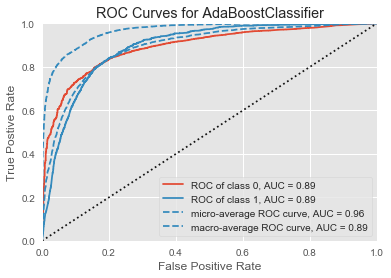

In [57]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
Recall=recall_score(y_test,pred_AB)
PreScore=precision_score(y_test,pred_AB)
F1Score=f1_score(y_test,pred_AB)
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB],'Precision': PreScore,'Recall': Recall, 'F1 Score': F1Score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]

# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()


In [58]:
resultsDf

,Method,accuracy,Precision,Recall,F1 Score
0,LogReg,0.89,0.58,0.28,0.37
0,Decision Tree,0.87,0.45,0.46,0.46
0,D Tree Prunned,0.88,0.50,0.33,0.40
0,Random Forest,0.90,0.60,0.37,0.46
0,Bagging,0.90,0.58,0.43,0.50
0,Adaboost,0.89,0.58,0.14,0.23


### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

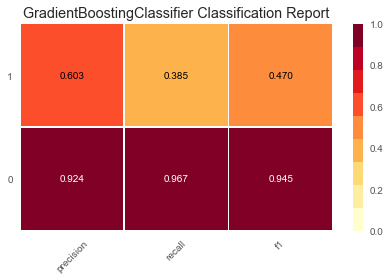

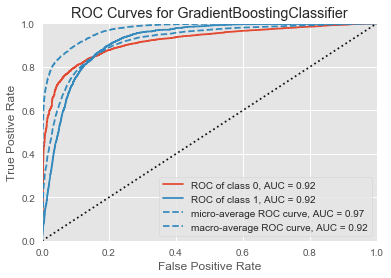

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=33)
gbcl = gbcl.fit(X_train, y_train)

pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
Recall=recall_score(y_test,pred_GB)
PreScore=precision_score(y_test,pred_GB)
F1Score=f1_score(y_test,pred_GB)
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB],'Precision': PreScore,'Recall': Recall, 'F1 Score': F1Score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]

# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=33))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1 , random_state=33))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()


In [60]:
resultsDf

,Method,accuracy,Precision,Recall,F1 Score
0,LogReg,0.89,0.58,0.28,0.37
0,Decision Tree,0.87,0.45,0.46,0.46
0,D Tree Prunned,0.88,0.50,0.33,0.40
0,Random Forest,0.90,0.60,0.37,0.46
0,Bagging,0.90,0.58,0.43,0.50
0,Adaboost,0.89,0.58,0.14,0.23
0,Gradient Boost,0.90,0.60,0.39,0.47


## 3. Make a DataFrame to compare models and their metrics. 
Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

#### For this dataset, Random Forest, Bagging and Gradient Boost models give the best results on test predictions.   Out of those 3 models, the recall is best in Bagging, hence is better to predict if a person would take a Term Deposit in the next campaign, although takes longer to process. 
#### So, I would recommend Bagging to the Marketing department, as it is the most 'balanced'  model.

### --
Comment: Looking at the source of this database, there is another database that has 20 features instead of 17, adding social context attributes, it would be worth to perform this whole project with that database and see if it increases performance